### IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
### Find the most voted movie in IMDB Movie Database.
### Print the movie name and the rating of that movie.

In [20]:
import pandas as pd
import sqlite3

db = sqlite3.connect('IMDB.sqlite')
imdb_df = pd.read_sql_query('Select * from imdb', db)
df = imdb_df[imdb_df['TotalVotes'] == imdb_df['TotalVotes'].max()]
print(df['Title'].iloc[0], df['Rating'].iloc[0])

Inception (2010) 8.8


### Find the Movie with Longest-Running Time from IMDB Movie database.
### Print the name of movie and running time as integer value.
### Note: Don't print 'min' in running time.

In [27]:
import pandas as pd
import sqlite3

def gettime(s):
    time = s[:-4].strip()
    if time=='':
        return 0
    return int(time)
db = sqlite3.connect('IMDB.sqlite')
imdb_df = pd.read_sql_query('Select * from imdb', db)
imdb_df['Runtime'] = imdb_df['Runtime'].apply(gettime)
df = imdb_df[imdb_df['Runtime'] == imdb_df['Runtime'].max()]
print(df['Title'].iloc[0], df['Runtime'].iloc[0])


The Wolf of Wall Street (2013) 180


### Find the movie which has maximum net profit in IMDB Movie Database.
### Print the movie name.
### Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

In [65]:
import sqlite3
import pandas as pd

def get_budget(s):
    if pd.isnull(s) or s=='' :
        return 0.0
    return float(s)
db = sqlite3.connect('IMDB.sqlite')
df = pd.read_sql_query('select Title,Domestic,budget,Worldwide from imdb inner join earning on earning.Movie_id = imdb.Movie_id',db)
#df[pd.isnull(df['Budget'])] = 0.0
df['earnings'] = df['Domestic']+df['Worldwide']
df['bud'] = df['Budget'].apply(get_budget)
df['NetProfit'] = df['earnings']-df['bud']
req = df[df['NetProfit'] == df['NetProfit'].max()]
print(req['Title'].iloc[0])

Star Wars: The Force Awakens (2015)


### Find the least budgeted movie in IMDB Movie Database.
### If there is more than one least budgeted movies then print the movie which has maximum net profit.
### Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

In [36]:
import sqlite3
import pandas as pd

db = sqlite3.connect('IMDB.sqlite')
df = pd.read_sql_query('select Title,Domestic,budget,Worldwide from imdb inner join earning on earning.Movie_id = imdb.Movie_id',db)

df.drop(df[df['Budget']==''].index, inplace=True)

df['earnings'] = df['Domestic']+df['Worldwide']
df['NetProfit'] = df['earnings']-df['Budget']
df.sort_values('Budget', inplace=True)
print(df['Title'].iloc[1])

Short Term 12 (2013)


### Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.
### Print the Year and name of the movie which was the highest grosser in that year.

In [58]:
import sqlite3
import pandas as pd

def get_year(title):
    return title[-5:-1]

db = sqlite3.connect('IMDB.sqlite')
df = pd.read_sql_query('select Title,Domestic,budget,Worldwide from imdb inner join earning on earning.Movie_id = imdb.Movie_id',db)
df['Year'] = df['Title'].apply(get_year)
df['earning'] = df['Domestic']+df['Worldwide']
df.sort_values('Year', inplace=True) #sort on basis of year
req = df.groupby('Year')
for yr,yr_df in req:
    req_yr_df = yr_df[yr_df['earning'] == yr_df['earning'].max()]
    print(yr, req_yr_df['Title'].iloc[0])

2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


### Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.
### Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..
### Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.

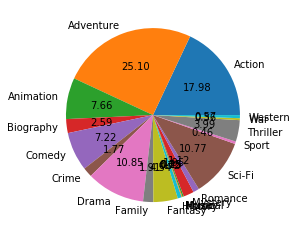

Action 17.98
Adventure 25.10
Animation 7.66
Biography 2.59
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


In [85]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def chk_budget(bud):
    if bud=='':
        return 0.0
    return float(bud)

db = sqlite3.connect('IMDB.sqlite')
df = pd.read_sql_query('select Budget, genre from imdb inner join genre on genre.Movie_id = imdb.Movie_id',db)
df['Budget'] = df['Budget'].apply(chk_budget)
req = df.groupby('genre')['Budget'].agg(np.sum)
np_gn = np.array(req.index[1:]) # [1:] bcz at 0 th index empty genre is present which shd be ignored
np_bud = np.array(req.values[1:])

plt.pie(np_bud, labels=np_gn, autopct='%.2f')
plt.show()

total = np.sum(np_bud)
for i in range(len(np_gn)):
    per = np_bud[i]/total*100
    print(np_gn[i], format(per, '.2f'))


### Find out the percentage of the total earning for each genre in IMDB Movie Dataset?Plot the pie chart.
### Print the genre and percentage of movies total earning present in that genre with 2 decimal place after rounding off.

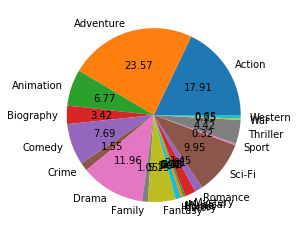

Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Mystery 2.01
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


In [99]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

db = sqlite3.connect('IMDB.sqlite')
#df = pd.read_sql_query('select Title,Domestic,budget,Worldwide from imdb inner join earning on earning.Movie_id = imdb.Movie_id',db)
df = pd.read_sql_query('select Domestic ,Worldwide, genre from earning inner join genre on genre.Movie_id = earning.Movie_id',db)
df['earnings'] = df['Worldwide'] + df['Domestic']
req = df.groupby('genre')['earnings'].agg(np.sum)
np_gn = np.array(req.index[1:]) # [1:] bcz at 0th index empty genre is present which shd be ignored
np_ear = np.array(req.values[1:])

plt.pie(np_ear, labels=np_gn, autopct='%.2f')
plt.show()

total = np.sum(np_ear)
for i in range(len(np_gn)):
    per = np_ear[i]/total*100
    print(np_gn[i], format(per, '.2f'))

### Find the movie which has genre of 'Sci-Fi' and 'Mystery' and movie rating is greater or equal to 8 from IMDB Movie Database.
### Print the movie name.

In [111]:
import sqlite3
import pandas as pd
import numpy as np

db = sqlite3.connect('IMDB.sqlite')
df = pd.read_sql_query('select Title,Rating,genre from imdb inner join genre on genre.Movie_id=imdb.Movie_id',db)
req = df[(df['Rating']>=8) & ((df['genre']=='Sci-Fi') | (df['genre']=='Mystery'))]
grouped = req.groupby('Title')
for tit,tit_df in grouped:
    # Now whichever dataframe has 2 rows i.e is the answer bcz 1 row for Sci-Fi and other row for Mystery
    if(len(tit_df)==2):
        print(tit)

Arrival (2016)
